Column names: ['sunlight_hours', 'watering_freq_per_week', 'soil_type', 'water_need']
Accuracy: 0.15
Precision (macro): 0.121031746031746
Recall (macro): 0.2333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.25      1.00      0.40         1
           4       0.33      0.20      0.25         5
           5       0.14      0.20      0.17         5
           6       0.00      0.00      0.00         4

    accuracy                           0.15        20
   macro avg       0.12      0.23      0.14        20
weighted avg       0.13      0.15      0.12        20



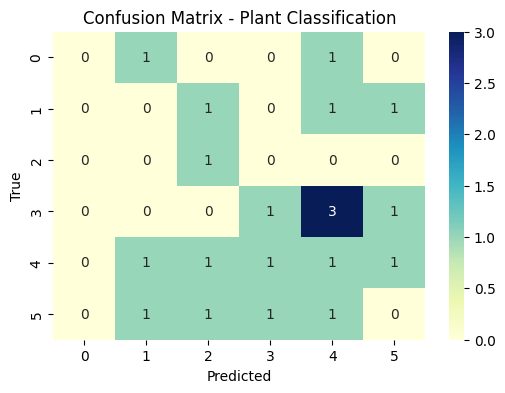

In [13]:
# Install required libraries
!pip install -q seaborn scikit-learn matplotlib pandas

# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Step 2: Load the uploaded dataset
df = pd.read_csv('/content/plants.csv')

# Step 3: Display column names to verify exact spelling
print("Column names:", df.columns.tolist())

# Step 4: Replace spaces in column names with underscores
# This ensures consistency and avoids issues with spaces within column names
df.columns = df.columns.str.replace(' ', '_')

# Step 5: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 6: Define target column correctly after replacing spaces with underscores
# Ensure this matches the exact column name after replacing spaces
target_column = 'watering_freq_per_week'  # Change this to the correct column if needed - it looks like 'watering frequency' in the data

# Step 7: Define X and y
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 8: Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Step 10: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Plant Classification')
plt.show()